# Twitter Setiment Analysis 

### Imports

In [75]:
import sys
!{sys.executable} -m pip install tweepy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install wordcloud
!{sys.executable} -m pip install textblob
!{sys.executable} -m pip install geopy
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install folium
!{sys.executable} -m pip install imageio


    100% |████████████████████████████████| 3.3MB 370kB/s ta 0:00:01


In [65]:
# Basic Imports
import tweepy
import urllib.request
import pandas as pd     
import numpy as np 
import time
import os
import re

# Plotting and Visualization
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
%matplotlib inline

# TextBlob Imports
from textblob import TextBlob
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier

# NLTK Imports
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

#MAP
from geopy.geocoders import Nominatim
import folium
from folium import plugins
from geopy.geocoders import Nominatim

{"here's", 'but', "how's", 'hers', "you've", 'should', 'they', 'itself', 'just', 'is', 'his', 'same', "they'd", 'ever', 'than', 'own', 'too', 'through', "you'd", "shouldn't", 'their', 'by', "can't", 'very', "didn't", 'can', "won't", 'above', 'an', "he'd", "hadn't", 'on', 'this', 'com', 'that', 'am', 'does', 'like', "they'll", 'as', "you're", 'what', 'r', 'was', 'http', "i'm", 'against', "she's", 'when', 'shall', 'not', 'my', "mustn't", 'having', 'further', 'again', 'nor', 'so', "why's", 'myself', 'for', 'why', 'with', "i'll", 'because', 'then', 'however', 'been', 'other', "she'd", 'i', 'the', 'themselves', "wasn't", 'below', 'being', "don't", 'ours', 'him', "we're", 'your', 'in', "haven't", "isn't", 'also', 'she', 'ourselves', 'otherwise', 'do', "he's", 'such', 'therefore', 'all', 'off', 'after', "that's", 'from', 'are', "it's", 'he', "couldn't", "we'll", "where's", 'once', "i'd", 'whom', 'into', 'herself', 'which', 'if', 'both', 'www', "what's", 'you', 'our', 'them', 'its', 'were', "w

### Twitter Autentication Keys

In [17]:
#Keys for autentication
consumer_key=''
consumer_secret=''

access_token=''
access_token_secret=''

### Twitter Autentication

In [20]:
#Autentication Methods
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

### Searching for Tweets

In [22]:
#Searchin Twitter Timelines
tweets = []
info = []

for tweet in tweepy.Cursor(api.search,
                           q="lula bolsonaro",
                           tweet_mode='extended',
                           rpp=100,
                           result_type="popular",
                           include_entities=True,
                           lang="pt").items(1500):
    if 'retweeted_status' in dir(tweet):
        aux=tweet.retweeted_status.full_text
    else:
        aux=tweet.full_text
        
    newtweet = aux.replace("\n", " ")
   
    tweets.append(newtweet)
    info.append(tweet)
    
    file = open("lula-bolsonaro.txt", "a", -1, "utf-8")
    file.write(newtweet+'\n')
    file.close()
    
    time.sleep(0.5)

### Creating the dataframe 

In [23]:
#Construction of the dataframe
tweets_df = pd.DataFrame(tweets, columns=['Tweets']) 

tweets_df['len']  = np.array([len(tweet) for tweet in tweets])
tweets_df['ID']   = np.array([tweet.id for tweet in info])
tweets_df['Date'] = np.array([tweet.created_at for tweet in info])
tweets_df['Source'] = np.array([tweet.source for tweet in info])
tweets_df['Likes']  = np.array([tweet.favorite_count for tweet in info])
tweets_df['RTs']    = np.array([tweet.retweet_count for tweet in info])
tweets_df['User Location']    = np.array([tweet.user.location for tweet in info])
tweets_df['Geo']    = np.array([tweet.geo for tweet in info])
tweets_df['Coordinates']    = np.array([tweet.coordinates for tweet in info])

tweets_df.to_csv("lula-bolsonaro.csv")

In [25]:
tweets_df.head()

,Tweets,len,ID,Date,Source,Likes,RTs,User Location,Geo,Coordinates
0,"emicida disse que a barbara gancia, para ataca...",220,1287927384671387649,2020-07-28 01:46:31,Twitter Web App,2398,304,,None,None
1,Quem conhece essa estratégia não se surpreende...,267,1288110498899091458,2020-07-28 13:54:09,Twitter for iPhone,738,161,São Paulo - SP,None,None
2,Frase do dia “Bolsonaro pode fazer o que quise...,304,1287697591296315393,2020-07-27 10:33:24,Twitter Web App,1387,149,,None,None
3,"União macabra contra a Lava Jato: Lula/PT, Bol...",96,1287859483033702401,2020-07-27 21:16:42,Twitter for iPhone,180,48,natalini@natalini.com.br,None,None
4,Não tem Lula. Não tem Haddad. Não tem Flavio D...,249,1286639285312126982,2020-07-24 12:28:04,Twitter Web App,2757,698,,None,None


### Top Tweets

In [26]:
# Top Searched Tweets
fav_max = np.max(tweets_df['Likes'])
rt_max  = np.max(tweets_df['RTs'])

fav = tweets_df[tweets_df.Likes == fav_max].index[0]
rt  = tweets_df[tweets_df.RTs == rt_max].index[0]

# Max FAVs:
print("O tweet com mais curtidas é: \n{}".format(tweets_df['Tweets'][fav]))
print("Número de curtidas: {}".format(fav_max))
print("\n")
# Max RTs:
print("O tweet com mais retweet é: \n{}".format(tweets_df['Tweets'][rt]))
print("Número de retweets: {}".format(rt_max))

O tweet com mais curtidas é: 
Ciro, Marina, Flavio Dino, Mandetta, Moro, Lula ou Haddad ou Gleisi, Luciano Huck. Vocês acham que algum desses têm chance de vencer Bolsonaro em 2022?
Número de curtidas: 21621


O tweet com mais retweet é: 
Ciro, Marina, Flavio Dino, Mandetta, Moro, Lula ou Haddad ou Gleisi, Luciano Huck. Vocês acham que algum desses têm chance de vencer Bolsonaro em 2022?
Número de retweets: 2417


### Source of Tweets

In [27]:
#Source of the Tweets
sources = []
for source in tweets_df['Source']:
    if source not in sources:
        sources.append(source)

percent = np.zeros(len(sources))

for source in tweets_df['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

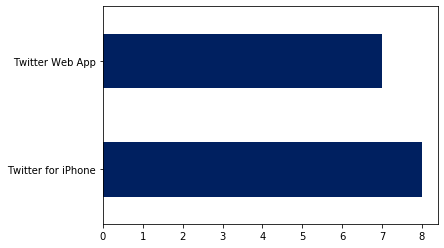

In [28]:
newDF = pd.DataFrame({
 'source':percent,
}, index=sources)

sources_sorted = newDF.sort_values('source',ascending=False)
ax = sources_sorted.source.plot(kind='barh',color='#002060')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

## Downloading annotations

In [69]:
link_stopwords = 'https://gist.githubusercontent.com/alopes/5358189/raw/2107d809cca6b83ce3d8e04dbd9463283025284f/stopwords.txt'
links_corpus = [
                'https://www.linguateca.pt/Repositorio/ReLi/ADJ_Negativos.txt',
                'https://www.linguateca.pt/Repositorio/ReLi/MWE_Negativos.txt',
                'https://www.linguateca.pt/Repositorio/ReLi/Subst_Negativos.txt',
                'https://www.linguateca.pt/Repositorio/ReLi/Verbos_Negativos.txt',
                'https://www.linguateca.pt/Repositorio/ReLi/ADJ_Positivos.txt',
                'https://www.linguateca.pt/Repositorio/ReLi/MWE_Positivos.txt',
                'https://www.linguateca.pt/Repositorio/ReLi/Subst_Positivos.txt',
                'https://www.linguateca.pt/Repositorio/ReLi/Verbos_Positivos.txt'
]
base_path = './ReLi-Lex/'
if not os.path.exists(base_path):
    os.makedirs(base_path)

for url in links_corpus:
    breadcomb = url.split('/')
    filename = breadcomb[len(breadcomb)-1]
    filepath = base_path+filename
    if not os.path.exists(filepath):
        urllib.request.urlretrieve(url, base_path+filename)

if not os.path.exists('stopwords_portuguese.txt'):
    urllib.request.urlretrieve(link_stopwords, 'stopwords_portuguese.txt')

### Training Model

In [53]:
#Sentiment Analysis in Português and English

#base_path = 'c:/ReLi-Lex'
train = []
wordsPT = []
wordsPT_sentiments = []

files = [os.path.join(base_path, f) for f in os.listdir(base_path)]

for file in files:
    t = 1 if '_Positivos' in file else -1
    with open(file, 'r',encoding='iso-8859-1') as content_file:
        content = content_file.read()        
        all = re.findall('\[.*?\]',content)
        for w in all:
            wordsPT.append((w[1:-1]))
            wordsPT_sentiments.append(t)
            train.append((w[1:-1], t))

cl = NaiveBayesClassifier(train)

<NaiveBayesClassifier trained on 609 instances>


In [54]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

### Sentiment Analysis with TextBlob

In [55]:
def sentiment(tweet):
    
    polarity = 0
    
    #blob = TextBlob(tweet, classifier=cl)
    blob = TextBlob(clean_tweet(tweet), classifier=cl) #Clean Tweets
    
    for s in blob.sentences:
        polarity = s.classify() + polarity
    
    if polarity > 0:
        return 1
    elif polarity < 0:
        return -1
    else:
        return 0

In [56]:
def analize_sentimentEN(tweet):
    
    analysis = TextBlob(tweet)
    
    if analysis.detect_language() != 'en':
        analysis = TextBlob(str(analysis.translate(to='en')))
        time.sleep(0.5)    
        
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [57]:
#tweets_df['SA'] = np.array([ analize_sentimentEN(tweet) for tweet in tweets_df['Tweet'] ]) #English Dictionary

In [58]:
tweets_df['SA TextBlob'] = np.array([ sentiment(tweet) for tweet in tweets_df['Tweets'] ]) #Portuguese Dictionary

### Results of Sentiment Analysis

In [59]:
#Sentiment Analysis Results
pos_tweets = [ tweet for index, tweet in enumerate(tweets_df['Tweets']) if tweets_df['SA TextBlob'][index] > 0]
neg_tweets = [ tweet for index, tweet in enumerate(tweets_df['Tweets']) if tweets_df['SA TextBlob'][index] < 0]

In [60]:
print("Porcentagem de Tweets Positivos: {}%".format(len(pos_tweets)*100/len(tweets_df['Tweets'])))
print("Porcentagem de Tweets Negativos: {}%".format(len(neg_tweets)*100/len(tweets_df['Tweets'])))

Porcentagem de Tweets Positivos: 73.33333333333333%
Porcentagem de Tweets Negativos: 26.666666666666668%


In [61]:
sentiments = ['Positivos', 'Negativos']
percents = [len(pos_tweets), len(neg_tweets)]

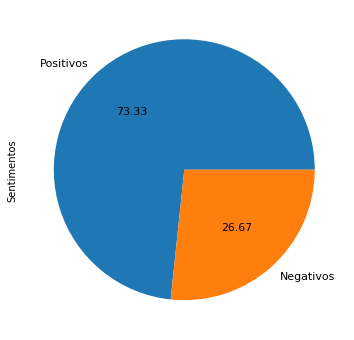

In [62]:
pie_chart = pd.Series(percents, index=sentiments, name='Sentimentos')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

### Word Cloud

In [72]:
stopwords= set(STOPWORDS)

new_words = []
with open("stopwords_portuguese.txt", 'r') as f:
    [new_words.append(word) for line in f for word in line.split()]

new_stopwords = stopwords.union(new_words)

In [73]:
words = ' '.join(tweets_df['Tweets'])

words_clean = " ".join([word for word in words.split()
                            if 'https' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

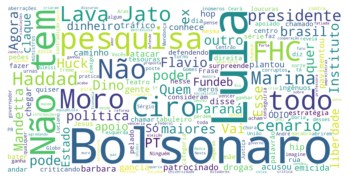

In [84]:
from imageio import imread
import warnings

warnings.simplefilter('ignore')

#twitter_mask = imread('brasil_mask.png')

wc = WordCloud(min_font_size=10, 
               max_font_size=300, 
               background_color='white', 
               mode="RGB",
               stopwords=new_stopwords,
               width=2000, 
               height=1000,               
               #mask=twitter_mask,
               normalize_plurals= True).generate(words_clean)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig('lula-bolsonaro.png', dpi=300)
plt.show()

### Time Series

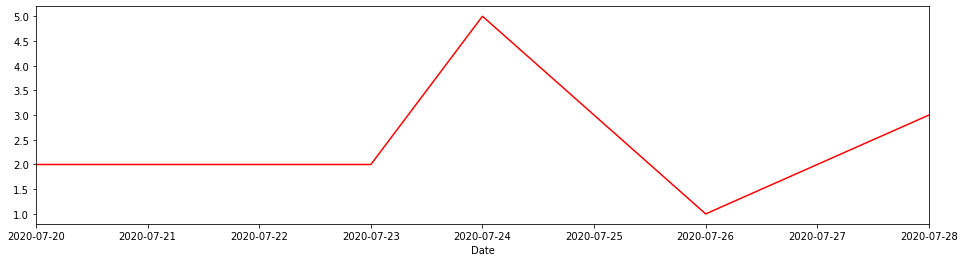

In [85]:
#Tweets per Day
data = tweets_df

data['Date'] = pd.to_datetime(data['Date']).apply(lambda x: x.date())

tlen = pd.Series(data['Date'].value_counts(), index=data['Date'])
tlen.plot(figsize=(16,4), color='r');

# Twitter Setiments Analisys with NLTK

### Training Model

In [86]:
vectorizer = CountVectorizer(analyzer="word")
freq_tweets = vectorizer.fit_transform(wordsPT)
modelo = MultinomialNB()
modelo.fit(freq_tweets,wordsPT_sentiments);

### Sentiment Analisys

In [87]:
tweetsarray = []

for tw in tweets_df['Tweets']:
    text = clean_tweet(tw)
    tweetsarray.append(text)

In [88]:
predictionData = vectorizer.transform(tweets_df['Tweets'])
tweets_df['SA NLTK'] = modelo.predict(predictionData)

### Results of Sentiment Analysis

In [89]:
#Sentiment Analysis Results
pos_tweets = [ tweet for index, tweet in enumerate(tweets_df['Tweets']) if tweets_df['SA NLTK'][index] > 0]
neg_tweets = [ tweet for index, tweet in enumerate(tweets_df['Tweets']) if tweets_df['SA NLTK'][index] < 0]

In [90]:
print("Porcentagem de Tweets Positivos: {}%".format(len(pos_tweets)*100/len(tweets_df['Tweets'])))
print("Porcentagem de Tweets Negativos: {}%".format(len(neg_tweets)*100/len(tweets_df['Tweets'])))

Porcentagem de Tweets Positivos: 93.33333333333333%
Porcentagem de Tweets Negativos: 6.666666666666667%


In [91]:
sentiments = ['Positivos', 'Negativos']
percents = [len(pos_tweets), len(neg_tweets)]

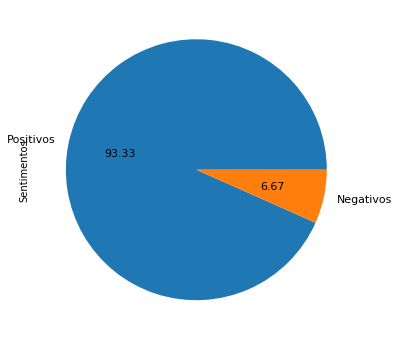

In [92]:
pie_chart = pd.Series(percents, index=sentiments, name='Sentimentos')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

### Map of Tweets

In [93]:
geolocator = Nominatim(user_agent="TweeterSentiments")

latitude = []
longitude = []

for user_location in tweets_df['User Location']:
    try:
        location = geolocator.geocode(user_location)
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    except:
        continue

In [94]:
coordenadas = np.column_stack((latitude, longitude))

mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start=4.)

mapa.add_child(plugins.HeatMap(coordenadas))
mapa.save('lula-bolsonaro.html')
mapa